# Estimating Stock Price Correlations using Wikipedia 

<br>
<br>

## Delia Rusu

<br>
<br>

<img src="images/PyData.png" width=200>

# About Me

<img src='images/DSC03277.jpg' width=500 height=500>


# Delia Rusu


- Chief Data Scientist @ Knowsis

- PhD, Natural Language Processing and Machine Learning

- Interests: unstructured data & finance

# This Talk

<img src="images/ThisTalk.jpg" width=800>

# Financial Data

<img src="images/FTSE100.png">

# Sources of Unstructured Data

- Annual reports

- Broker research

- Conference call transcripts

- Investor relations presentations

- News and press releases

- In-house content

# What about unconventional datasets?

# Wikipedia

- 10 edits per second

- the English Wikipedia 
  - currently has over 5M articles
  - average of 800 new articles per day 

# Structured Views of Wikipedia

- Wikipedia article -> vectorized representation of the context

- Wikipedia as a graph

# Word2Vec

- Word2Vec model (Mikolov et al. 2013)
  - distributional hypothesis: words in similar contexts have similar meanings
  - shallow, 2-layer neural network
  - training objective - learn word vector representations which can predict nearby words (in context)
  
<img src="images/SkipGramModel.png">

# Word & Article Vectors

- generate context vectors for:
  - words which appear in Wikipedia articles
  - Wikipedia articles themselves (topics)
  
- model: wiki2vec
  - https://github.com/idio/wiki2vec

**Unilever** is an Anglo-Dutch **multinational consumer goods company**

**Unilever_ID** is an Anglo-Dutch **multinational_consumer_goods_company_ID**

# Wikipedia Graph

- Types of nodes:
  - articles, categories
    
- Types of directed edges:
  - hyperlinks from article to article
  - infobox links from article to article 
  - links from article to category
  - links from category to category

# Graph-Based Similarity

- using the distance between nodes in the graph
  - in this case, $$Similarity(v_1,v_2) = 1 - Distance(v_1, v_2)$$
  
- using random walks on graphs
  - Personalized PageRank (Haveliwala, 2002) is a variation of PageRank (Brin and Page, 1998)
  - the user query defines how important the vertex is, such that PageRank will prefer vertexes in the vicinity of the query vertex.

# FTSE 100 Index Analysis

In [2]:
import pandas as pd

df_ftse_100_companies = pd.read_csv("ftse_100_companies.tsv", sep='\t')
df_ftse_100_companies.head()

,Company,Ticker,Sector,Market cap,Employees
0,3i,III,Private equity,4.06,266
1,Aberdeen Asset Management,ADN,Fund management,3.14,"1,800"
2,Admiral Group,ADM,Insurance,4.91,"2,500"
3,Anglo American plc,AAL,Mining,6.09,"100,000"
4,Antofagasta PLC,ANTO,Mining,4.71,"4,005"


# Wikipedia Similarity

- using gensim's Word2Vec for model building and similarity computation

- obtain pairwise similarity

In [3]:
df_similarities = pd.read_csv('ftse_100_company_pairs_similarities_w2v.csv')
df_similarities.head()

,Company1,Company2,W2V Similarity
0,3i,Aberdeen_Asset_Management,NaN
1,3i,Admiral_Group,NaN
2,3i,Anglo_American_plc,0.399286
3,3i,Antofagasta_PLC,NaN
4,3i,ARM_Holdings,0.267260


# Pricing Data 

In [30]:
from pandas_datareader import data
df_company_pricing = data.YahooDailyReader(symbols='AZN.L', start='2013-1-1').read()
df_company_pricing.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-01-01,2909.5,2909.50,2909.50,2909.5,0,2441.043
2013-01-02,2930.0,2969.30,2923.00,2969.0,2394700,2490.963
2013-01-03,2969.5,2982.50,2952.50,2980.0,1763100,2500.192
2013-01-04,2992.5,3005.00,2975.21,3000.0,2041100,2516.972
2013-01-07,2998.5,3004.99,2976.00,2985.0,1185200,2504.387


# Correlating Daily Returns

- Obtain daily returns for each FTSE 100 company

- Calculate the correlation for each possible pair

In [18]:
df_correlations = pd.read_csv('ftse_100_company_pairs_correlations.csv')
df_correlations.head()

,Company1,Company2,Correlation
0,3i,Aberdeen_Asset_Management,0.047557
1,3i,Admiral_Group,0.067823
2,3i,Anglo_American_plc,0.091343
3,3i,Antofagasta,0.057116
4,3i,ARM_Holdings,0.077546


# Does the Wikipedia Similarity Explain Correlation of Returns?

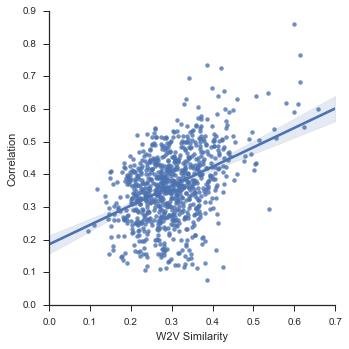

In [26]:
%matplotlib inline
from IPython.display import display
import seaborn as sns
sns.set(style="ticks")

df_market_cap = pd.read_csv('ftse_100_market_cap_7.csv')

display(sns.lmplot("W2V Similarity", "Correlation", data=df_market_cap))

$$R^2 = 0.179$$

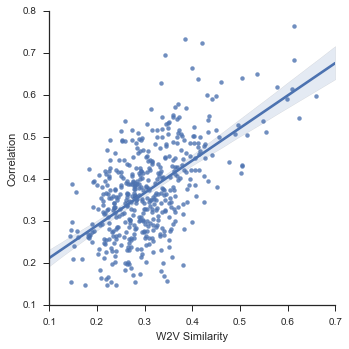

In [27]:
df_market_cap = pd.read_csv('ftse_100_market_cap_12.csv')

display(sns.lmplot("W2V Similarity", "Correlation", data=df_market_cap))

$$R^2 = 0.333$$

# Remarks

- Wikipedia, an unconventional source of unstructured data, has explanatory power for financial variables

- Graph-based similarity 
  - does not capture similarity so well within a specific topic
  - categories are too broad - e.g. "Companies listed on the London Stock Exchange", "Companies based in London" 

- Context-based similarity (Word2Vec)
  - more powerful measure, captures similarity between words, topics

- A lot more to be gained from industry-specific documents
  - e.g. annual reports, conference call transcripts

# Applications

- predicting financial figures solely based on unstructured data or using hybrid models (unstructured + structured data)

- estimating financial figures, ratios or statistical moments when relevant quantitative data is not available 
  - e.g. the time preceding an IPO

# Resources

- Word2Vec and Wiki2Vec
  - Tomas Mikolov, Ilya Sutskever, Kai Chen, Greg Corrado, and Jeffrey Dean. Distributed Representations of Words and Phrases and their Compositionality. In Proceedings of NIPS, 2013.
  - [Word2Vec code repository](https://code.google.com/archive/p/word2vec/)
  - [Word2Vec in gensim](https://radimrehurek.com/gensim/models/word2vec.html)
  - [Wiki2Vec](https://github.com/idio/wiki2vec)
  
- Graph-Based Similarity
  - Agirre, Eneko, Ander Barrena, and Aitor Soroa. "Studying the Wikipedia Hyperlink Graph for Relatedness and Disambiguation." arXiv preprint arXiv:1503.01655, 2015.
  - Delia Rusu. Text Annotation using Background Knowledge. PhD Thesis. Ljubljana, 2014.
  
- Notebook for this presentation
  - https://github.com/deliarusu

# Thank You!

# Questions?

<img src="images/ThisTalk.jpg" width=600>